# Regression

In [111]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv('data.csv')
# Exclude empty column 
df = df.drop('Unnamed: 6', axis = 1)
df

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error
0,1,84,254,0,3,2
1,0,58,247,0,6,9
2,0,56,125,1,6,8
3,0,55,22,0,11,7
4,1,95,262,0,2,3
...,...,...,...,...,...,...
95,0,57,358,0,13,7
96,1,93,71,0,3,0
97,0,80,34,1,0,9
98,1,82,49,1,4,1


In [113]:
df.isna().sum()
# No empty fields

Purchase        0
SUS             0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

In [29]:
# Data is already encoded, can skip that step
# Evaluate the correlation between the
# the independent variables and the dependent variable
df.corr(method='pearson')['SUS'].sort_values()

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64

### The strongest positive correlation is purchase and the Intent_Error and ASR_Error are strongly negatively correlated to SUS. 

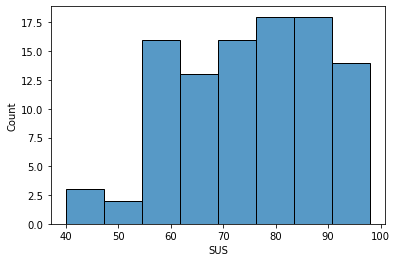

In [36]:
sns.histplot(data = df['SUS'], palette = "mako")
plt.show()

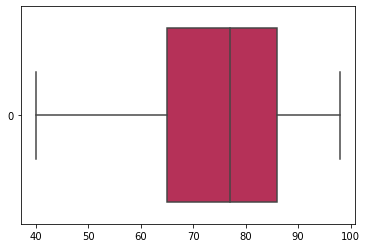

In [31]:
sns.boxplot(data = df['SUS'], orient = "h", palette = "mako")
plt.show()

### A SUS score of 68 is considerd average, so the majority of our responses fall into the above average range. 

<Figure size 1152x648 with 0 Axes>

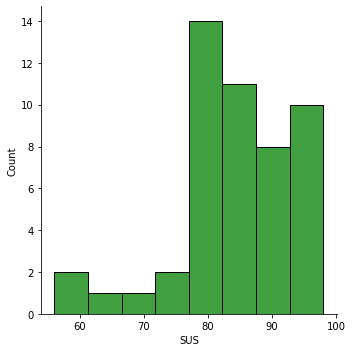

In [34]:
# Distribution of those who purchased a ticket
plt.figure(figsize=(16, 9))
sns.displot(df.loc[df['Purchase'] == 1]['SUS'], color = 'g')
plt.show()

<Figure size 1152x648 with 0 Axes>

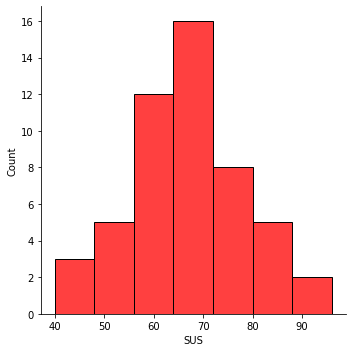

In [37]:
# Distribution of those who didn't purchased a ticket
plt.figure(figsize=(16, 9))
sns.displot(df.loc[df['Purchase'] == 0]['SUS'], color = 'r')
plt.show()

### For those who purchased, the SUS scores are skewed left, while those who didn't it normally distribuited
### Could this be explained by individuals who uses the service to buy tickets and decided to not in the end and less with difficulty of use.

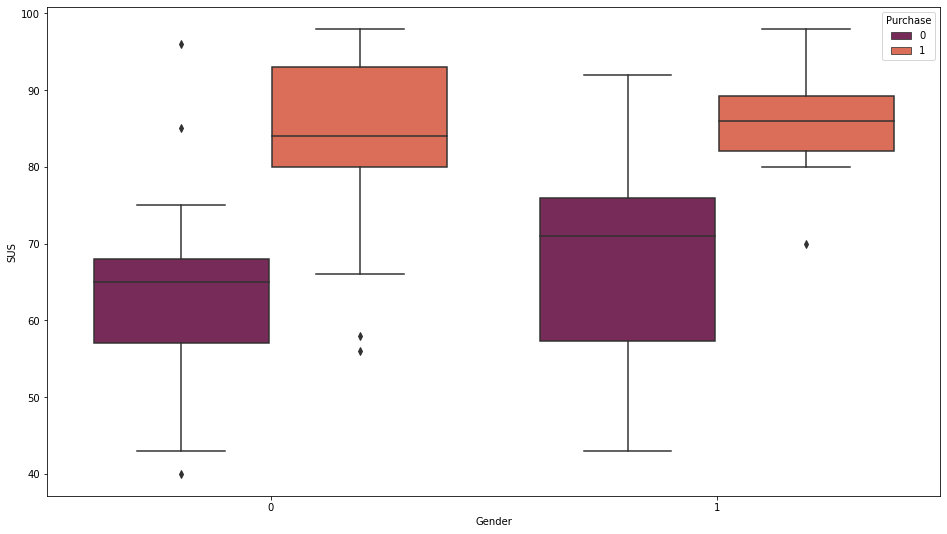

In [41]:
plt.figure(figsize=(16, 9))
sns.boxplot(x="Gender", y="SUS", hue="Purchase", data=df, palette='rocket')
plt.show()

### Between both genders, if they purchased a ticket is more important to a higher SUS score. 

In [110]:
import statsmodels.api as sm

y = df['SUS'] # dependent variable, what we want to predict
x = df.drop('SUS', axis = 1) # independent variables, what we want to predict with

In [92]:
x = sm.add_constant(x)

model = sm.OLS(y, x).fit() # Compute OLS with x and y data

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [94]:
# randomly split independent and dependent data into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [95]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [101]:
# independent training data
x_train

,const,Purchase,Duration,Gender,ASR_Error,Intent_Error
81,1.0,0,108,0,6,11
70,1.0,1,78,0,3,2
96,1.0,1,71,0,3,0
45,1.0,1,184,1,2,3
69,1.0,1,342,0,1,3
...,...,...,...,...,...,...
17,1.0,1,221,0,3,4
15,1.0,0,126,0,8,9
51,1.0,0,193,1,11,5
56,1.0,1,119,0,0,8


In [100]:
# dependent predicitons (Linear Regression)
y_train_pred

array([61.40648392, 85.00878178, 89.34303196, 85.1740705 , 86.53085486,
       88.60822663, 51.73618258, 89.74612198, 85.84109607, 84.44404279,
       80.50707571, 88.38499691, 76.59966489, 61.85055888, 60.937434  ,
       63.73646093, 67.4342053 , 62.00050882, 62.75007328, 69.67469225,
       78.3797838 , 66.30645121, 81.59495935, 70.66763258, 61.88847309,
       61.68185453, 86.34740598, 58.85395478, 70.04446451, 70.3745475 ,
       61.72297344, 83.92055084, 62.10820384, 58.62314944, 83.52942196,
       65.34979276, 85.60586041, 64.82651174, 87.86008357, 74.28941217,
       83.8354463 , 74.40196815, 58.79459238, 70.76514154, 82.33074281,
       69.02382579, 66.35128683, 75.20735124, 78.60230573, 74.02377611,
       84.25665168, 75.47005294, 87.75385475, 91.80005956, 77.90833436,
       66.32284267, 84.88660479, 82.27093713, 82.5303654 , 61.15928713,
       80.82342887, 63.1614847 , 79.38579735, 89.98676608, 86.88069189,
       64.41146058, 72.99760959, 89.75670652, 63.97869255, 57.31

In [118]:
# Fitting data to a quadratic curve instead of a line
quad = PolynomialFeatures(degree = 2)
x_quad = quad.fit_transform(x)

# Split it not random each time, so R Squared value is constant
X_train, X_test, Y_train, Y_test = train_test_split(x_quad, y)

plr = LinearRegression().fit(X_train, Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

In [119]:
# independent training data
X_train

array([[  1.,   0.,  57., ...,  64.,  24.,   9.],
       [  1.,   0., 190., ..., 121.,  44.,  16.],
       [  1.,   1., 208., ...,   0.,   0.,  16.],
       ...,
       [  1.,   1., 202., ...,   9.,   9.,   9.],
       [  1.,   0., 132., ...,  81.,  81.,  81.],
       [  1.,   0.,  46., ...,  36.,  66., 121.]])

In [120]:
# dependent predicitons (2-order Polynomial Regression)
Y_train_pred

array([74.05707703, 73.49973363, 90.37070801, 71.27134465, 81.88393001,
       74.99832681, 67.66485179, 92.17257708, 67.33023614, 69.99871454,
       88.85867393, 58.75424324, 63.61140844, 70.83161364, 78.36465865,
       61.00076616, 63.9076355 , 63.2252668 , 76.50596761, 69.85819379,
       69.82252054, 87.31697257, 80.53184444, 77.05285275, 72.7893494 ,
       85.94136274, 59.4303319 , 65.77909521, 69.78820386, 60.1191487 ,
       85.76628358, 79.53503542, 79.65879658, 81.86513257, 96.38190478,
       70.17597765, 70.46784167, 65.09784803, 93.63743624, 88.03397847,
       83.14051061, 84.5639303 , 86.02601969, 60.52318912, 64.01766974,
       60.55368509, 88.3423218 , 80.5885355 , 60.5804065 , 59.39662132,
       62.52010231, 82.74437445, 88.83901161, 93.3334975 , 90.21234427,
       80.85187439, 69.23245626, 94.01740037, 90.11397595, 69.92041085,
       85.56549653, 69.6593272 , 56.81201311, 66.33448179, 54.2364583 ,
       60.3656096 , 56.16793493, 85.37362164, 56.4077828 , 76.42

## 1. Show the statistical results of your trained regression model.

### Least Squares Results

In [106]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        16:19:24   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

### Linear Regression

In [107]:
print("The R square score of linear regression model is: ", lr.score(x_test,y_test))

The R square score of linear regression model is:  0.7322885247405222


#### R squared value changes drastically between runs. Probably insufficient data.

In [121]:
print("The R square score of 2-order polynomial regression model is: ", plr.score(X_test, Y_test))

The R square score of 2-order polynomial regression model is:  0.4186404549886158


## 2. What features are significant? What features are insignificant?

### From the OLS model summary, the features with the lowest P value and therefore the most significance to prediciting the SUS score are ASR_error and Intent_error: 0.001 and 0.000 respectively. Purchase, Duration, and Gender have much higher P values and are not statistically significant.

## 3. Were the results what you expected? Explain why or why not, for each feature.

### I expected the Purchase feature to have stronger significance, on the same level as the error rates. From the plots and correlation analysis it seemed it drived SUS scores as much as the error rates. From the data it did not seem the gender of the user nor the duration of the interation were going to have strong weight.

## 4. What does the model suggest is the most influential factor on SUS? Explain what tells you this is the most influential factor statistically.

### The most influential factors on SUS are the error rates. The P-values show that if the the error rates of the machine were not a factor, then we would not expect to see our results 99% of the time. This puts it into perspective. Without the error rates, we do not see why user satisfaction is effected.

## 5. What are the potential reasons for these factor(s) being significant predictors of SUS?

### The SUS asks a series of questions to guage the user's experience with the technology. A user who encountered a series of errors would be likely to answer these questions in a manner that lowers the SUS score. The question "I think that I would need the support of a technical person to be able to use this system." probably would be one that guages how smoothly the experience went. Furthermore, it's entirely possible for people to buy tickets and rate the system low in SUS. Maybe they tough it out, experiencing errors along the way but need to get this ticket. Their need of this service would further drive them to rate the experience as a negative one. 